# Applications of Deep Learning on Stock Market Time-Series Data 

Abstract:
<p>
    In this project we propose to apply deep learning methods on stock market data in order to predict their trends. The models will be based off of prior years of stock market data and will be organized based on the different markets while taking into consideration the various complications that arise with using time-series data. Upon completion of the project, we want to accurately map the trends of the stock market and consider the factors that change and effect it with little to no manual intervention. 

Methods and Tools
The models will primarily be written using the Tensor Flow and Keras python based machine learning languages and the Blue Waters super computer will be used in order to run the algorithms with GPU nodes. 


https://www.tensorflow.org/versions/r0.10/tutorials/index.html

https://keras.io/

Documentation for Keras and TensorFlow respectively.

### Relevant Papers and Tutorials/Guides

http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

https://github.com/RJT1990/pyflux

http://arxiv.org/abs/1607.07539

http://arxiv.org/pdf/1607.08665.pdf

https://duckduckgo.com/?q=deep+learning+"time+series"+keras&ia=web

http://iknowfirst.com/machine-learning-trading-stock-market-and-chaos

http://pure.au.dk/portal-asb-student/files/100363528/Herding_Behavior_in_Stock_Markets.pdf


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


import tensorflow as tf
import keras as kr

import datetime
import matplotlib.dates as mdates

import seaborn as sns
sns.set(palette="Set2")

#### Some Variables for Funsies

In [5]:
#Change to markdown and add extra information in including have a table of the stock symbols then formatting of 
#data how to use the functions below etc.
def print_stock_symbols():
    i = 0
    stock_market_symbols = []
    for x in range(len(minute_stock_data_OCT2010)):
        if(x%21==0):
            #print(minute_stock_data_OCT2010[x][0].decode("utf-8"))
            #print(minute_stock_data_OCT2010[x][0].decode("utf-8"))
            stock_market_symbols.append(minute_stock_data_OCT2010[x][0].decode("utf-8"))
            i+=1
            #print(i)
    return stock_market_symbols

In [26]:
stock_market_symbols=print_stock_symbols()
print(len(stock_market_symbols))
print(minute_stock_data_OCT2010_length)

2191
46011


In [9]:
minute_stock_data_OCT2010 = np.genfromtxt('mquote201010.csv', delimiter=',',names=True,dtype=None)
    #Use numpy genfromtxt to read data into an array

In [11]:
minute_stock_data_OCT2010_length = len(minute_stock_data_OCT2010) 
    #number of elements within the array
stock_steps = 21 
    #number of indices between separate stocks
start_day_index = 3 
    #where first minute starts
end_day_index = 393 
    #where last minute ends

In [12]:
time_stamps_temp = np.arange('2010-10-01T09:30', '2010-10-29T16:01', dtype='datetime64[m]')
count = 0
indexes = np.zeros(shape=(11520,),dtype=np.int)
for i in range(len(time_stamps_temp)):
    current_date = (str(time_stamps_temp[i]))[0:10]
    if(np.is_busday(current_date)==False):
         indexes[count]=int(i)
         count+=1
    else:
        pass
time_stamps = np.delete(time_stamps_temp,indexes)


In [13]:
num_over = 0
indexes_num2 = np.zeros(shape=(20980,),dtype=int)
for x in range(len(time_stamps)):        
    if('16:01' in str(time_stamps[x])):
        for y in range(1049):
            indexes_num2[num_over]=(x+y)
            num_over+=1

time_stamps = np.delete(time_stamps,indexes_num2)

time_stamps_real = np.zeros(shape=(8211,),dtype='datetime64[m]')
#Method instead just append np arrange on to the end of the thingies.

num_min_in_buisnness_month = len(time_stamps)
    #Number of minute level data points per the october month.

In [14]:
def create_dataframe(stock_data):
    stock_dictionary ={symbol: pull_all_data_in_month(minute_stock_data_OCT2010,symbol) for symbol in stock_data}
    stock_dataframe = pd.DataFrame(stock_dictionary,index=time_stamps)
    return stock_dataframe

In [23]:
stock_dataframe=create_dataframe(stock_market_symbols)

In [24]:
stock_dataframe.head(10)

,A,AA,AAI,AAN,AAP,AAV,AB,ABB,ABC,ABD,...,XRX,Y,YGE,YPF,YSI,YUM,YZC,ZEP,ZMH,ZNH
2010-10-01 09:30:00,33.695,12.285,7.355,18.590,58.960,6.335,26.560,21.515,30.555,5.840,...,10.415,304.505,13.850,39.615,8.440,46.665,24.385,17.630,52.670,29.205
2010-10-01 09:31:00,33.440,12.305,7.355,18.580,59.645,6.395,26.520,21.525,30.430,5.865,...,10.450,304.505,13.875,39.615,8.410,46.470,24.650,17.625,52.630,29.210
2010-10-01 09:32:00,33.845,12.345,7.355,18.520,59.365,6.350,26.600,21.515,30.595,5.840,...,10.460,304.390,13.870,39.615,8.415,46.580,24.670,17.370,52.585,29.240
2010-10-01 09:33:00,33.440,12.350,7.365,18.580,59.295,6.350,26.860,21.515,30.605,5.810,...,10.450,304.225,13.900,39.615,8.420,46.610,24.650,17.650,52.565,29.210
2010-10-01 09:34:00,33.755,12.385,7.365,18.565,59.365,6.290,26.735,21.505,30.600,5.835,...,10.460,303.985,13.925,39.515,8.420,46.585,24.535,17.555,52.170,29.170
2010-10-01 09:35:00,33.915,12.355,7.365,18.590,59.435,6.385,26.810,21.510,30.685,5.865,...,10.440,304.250,13.905,39.270,8.420,46.600,24.565,17.620,52.015,28.900
2010-10-01 09:36:00,33.935,12.360,7.365,18.560,59.490,6.360,26.930,21.525,30.695,5.855,...,10.425,303.775,13.955,39.275,8.375,46.575,24.565,17.615,52.320,29.230
2010-10-01 09:37:00,33.975,12.325,7.355,18.525,59.410,6.355,26.800,21.490,30.710,5.835,...,10.415,302.450,13.900,39.275,8.390,46.545,24.650,17.620,52.885,28.890
2010-10-01 09:38:00,34.025,12.325,7.355,18.485,59.385,6.365,26.810,21.475,30.700,5.820,...,10.420,302.610,13.875,39.550,8.385,46.310,24.650,17.620,52.450,29.100
2010-10-01 09:39:00,33.895,12.315,7.355,18.455,59.360,6.365,27.065,21.485,30.640,5.830,...,10.425,302.400,13.875,39.275,8.360,46.495,24.660,17.715,52.440,29.135


## Data Sorting/Retrieving Functions

Dates should be entered in in the following format: yearmonthday. Example Oct 1 2010 --> 20101001. Stock symbols should be entered in as strings corresponding to the list from the variables section. 

pull_stock_from_symbol(stock_data,symbol)
    
    returns index of where the first occurence of symbol is located in the orginal data array
    
pull_stock_from_index(stock_data,index)

    returns all the data from the orginal data array. This is not filtered for just the values.
    
pull_stock_from_date_and_symbol(stock_data,symbol,date)

    returns market values for a specific date (given that it is not a weekend) for a specific stock
    
pull_all_data_in_month(stock_data,symbol)

    return market values for full month given specfi symbol

In [16]:
def pull_stock_from_symbol(stock_data,symbol):
    #definition to pull specific index of stock data given symbol
    for i in range(minute_stock_data_OCT2010_length):
        if(minute_stock_data_OCT2010[i][0].decode("utf-8")==symbol):
            return i
        else:
            i+=stock_steps
    return False

In [17]:
def pull_stock_from_index(stock_data,index):
    #definition to pull specific data from index
    if(index%21==0 and index<minute_stock_data_OCT2010_length and index >=0):
        return minute_stock_data_OCT2010[index:index+21]
    else:
        index = index-(index%21)
        return minute_stock_data_OCT2010[index:index+21]

In [18]:
def pull_stock_from_date_and_symbol(stock_data,symbol,date):
    index = pull_stock_from_symbol(stock_data,symbol)
    single_day_data = np.zeros(shape=(391,),dtype=float)
    for i in range(index+21):
        if(minute_stock_data_OCT2010[i][1]==date):
            for x in range(391):
                single_day_data[x]=minute_stock_data_OCT2010[i][3+x]
        
    return single_day_data


In [19]:
def pull_all_data_in_month(stock_data,symbol):
    start_index = pull_stock_from_symbol(stock_data,symbol)
        #Get the correct start index for stock
    symbol_month_data = np.zeros(shape=(8211,),dtype=np.float)
        #Create an empty array of correct size
        #Fill it in with a double array
    index = 0 
    for x in range (start_index,start_index+21):
        for y in range(3,394):
            symbol_month_data[index]=minute_stock_data_OCT2010[x][y]
            #print(symbol_month_data[index])
            index+=1

    #print(index)  
    return symbol_month_data

In [20]:
def time_array_per_day(date):
    date_format = str(date)
    date_format = date_format[0:4]+'-'+date_format[4:6]+'-'+date_format[6:8]
    date_start = date_format+'T09:30'
    date_end = date_format+'T16:01'
    return np.arange(date_start, date_end, dtype='datetime64[m]')
    

In [21]:
def get_stock_info(symbol):
    #Print out stock name its high and low on their respective days 
    return 0

## Graphing Functions


graph_single_day_stock_data(symbol,date)

    Symbol inputted as str and date entered in in the formal yearmonthday ex(20101001)
    Prints out opening market day price and closing market day price and highest market value
    
graph_full_month_data(symbol)

    Symbol inputted as str. Prints the highest market and lowest market value for the month graphs the values
    of the stock over the course of the month
  
graph_find_correlation(symbol1,symbol2)

    Symbol1 and symbol2 inputted as str. Graphs a scatter plot along with a line of best fit between two stocks.
    Prints out correlation coefficient R in addition to the slope of the best fit line.
    
graph_all_days_in_month(symbol)

    Symbol inputted as str, graphs subplots of each individual day in the month for the corresponding symbol.
    
    
    

In [20]:
def graph_single_day_stock_data(symbol,date):
    stock_to_graph = pull_stock_from_date_and_symbol(minute_stock_data_OCT2010,symbol,date)
    single_date_data = time_array_per_day(date)
    fig_stock,ax_stock=plt.subplots(figsize=(15,10))
    ax_stock.plot(single_date_data,stock_to_graph,color='indigo')
    ax_stock.set_xlabel('Hours of Current Day')
    ax_stock.set_ylabel('Stock Values')
    ax_stock.set_title('Stock Data for Single Day')
    print("Opening Day Value:",stock_to_graph[0],"Closing Day Value:",stock_to_graph[390])
    print("Highest Market Value For Day:",np.amax(stock_to_graph))
    print("Lowest Market Value For Day:",np.amin(stock_to_graph))

In [98]:
def graph_full_month_data(symbol):
    stock_to_graph =pull_all_data_in_month(minute_stock_data_OCT2010,symbol)
    #daily = mdates.DayLocator()
    #hours = mdates.HourLocator()
    #dfmt = mdates.DateFormatter('%b %d')
    fig_stock,ax_stock=plt.subplots(figsize=(15,10))
    plt.tight_layout()
    ax_stock.plot(stock_to_graph,color='indigo')
    #plt.gcf().autofmt_xdate()
    #ax_stock.set_xlim(734046.395833,734074.666667)
    #ax_stock.xaxis.set_minor_locator(daily)
    ax_stock.set_xticklabels([time for time in time_stamps[::len(time_stamps)//10]]);
    ax_stock.set_xlabel('Month-Day-Year of Oct.')
    ax_stock.set_ylabel('Stock Values')
    ax_stock.set_title('Full Month Stock Data')
    print("Highest Market Value For Month:",np.amax(stock_to_graph))
    print("Lowest Market Value For Month:",np.amin(stock_to_graph))

In [85]:
def graph_find_correlation(symbol1,symbol2):
    stock1 = pull_all_data_in_month(minute_stock_data_OCT2010,symbol1)
    stock2 = pull_all_data_in_month(minute_stock_data_OCT2010,symbol2)
    fig_stock,ax_stock = plt.subplots(figsize=(15,10))
    ax_stock.scatter(stock1,stock2,color='indigo')
    ax_stock.plot(np.unique(stock1), np.poly1d(np.polyfit(stock1, stock2, 1))(np.unique(stock1)),color='orchid')
    slope_bestfit,intercept=np.polyfit(stock1,stock2,1)
    ax_stock.set_xlabel('Stock 1 Values')
    ax_stock.set_ylabel('Stock 2 Values')
    ax_stock.set_title('Looking for Correlations')
    A = np.vstack([stock1,np.ones(len(stock1))]).T
    m,c = np.linalg.lstsq(A,stock2)[0]
    #plt.plot(stock1,stock1*m+c,color='blue')
    correlation_r = np.corrcoef(stock2,stock1)[1,0]
    print("Slope of Best fit is equal to:",slope_bestfit)
    print("Numpy Correlation Coefficient is equal to:",correlation_r)
    print("The slope  of best fit and the numpy correlation coefficient are for full month of data.")


In [86]:
def graph_all_days_in_month(symbol):
    index = pull_stock_from_symbol(minute_stock_data_OCT2010,symbol)
    
    fig,ax = plt.subplots(3,7,figsize=(35,17))
    for x in range(3):
        for y in range(7):
            date = minute_stock_data_OCT2010[index][1]
            ax[x][y].plot(time_array_per_day(date),pull_stock_from_date_and_symbol(minute_stock_data_OCT2010,symbol,date),color='indigo')
            xfmt = mdates.DateFormatter('%H:%M')
            ax[x][y].xaxis.set_major_formatter(xfmt)
            ax[x][y].set_title('Stock for Data:' + str(minute_stock_data_OCT2010[index][1]))
            index+=1
            #xloc = plt.MaxNLocator(3)
            #ax[x][y].xaxis.set_major_locator(xloc)
            
    plt.suptitle("Full Month Plotted as Individual Days",fontsize=20)
    fig.text(0.5, 0.07, 'Opening (9:30) to Closing (4:00)', ha='center')
    fig.text(0.1, 0.5, 'Stock Values', va='center', rotation='vertical')

In [48]:
def bayesian_correlation(symbol1,symbol2):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, xlabel=symbol1, ylabel=symbol2)
    colors = np.linspace(0.1, 1, len(stock_A_data))
    mymap = plt.get_cmap("winter")
    sc = ax.scatter(pull_all_data_in_month(minute_stock_data_OCT2010,symbol1), pull_all_data_in_month(minute_stock_data_OCT2010,symbol2), c=colors, cmap=mymap, lw=0)
    cb = plt.colorbar(sc)
    cb.ax.set_yticklabels([time for time in time_stamps[::len(time_stamps)//10]]);
    return sc

### Sample Graphs of Stock A 

Highest Market Value For Month: 35.52
Lowest Market Value For Month: 32.15


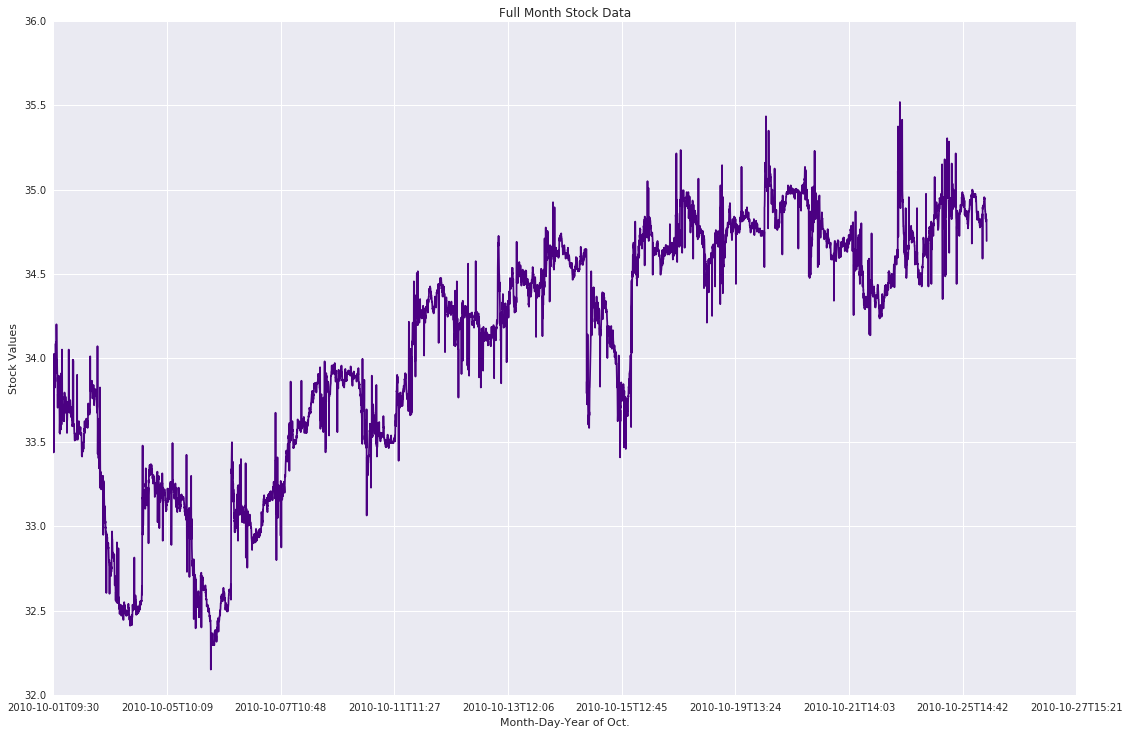

In [99]:
graph_full_month_data('A')
#trying to figure out better look for this graph because it looks kind of awful
#maybe just a useless graph 
#plt.show()
#stock_dataframe['A'].plot()
#graph_full_month_data_take_two('A')
#plt.plot()

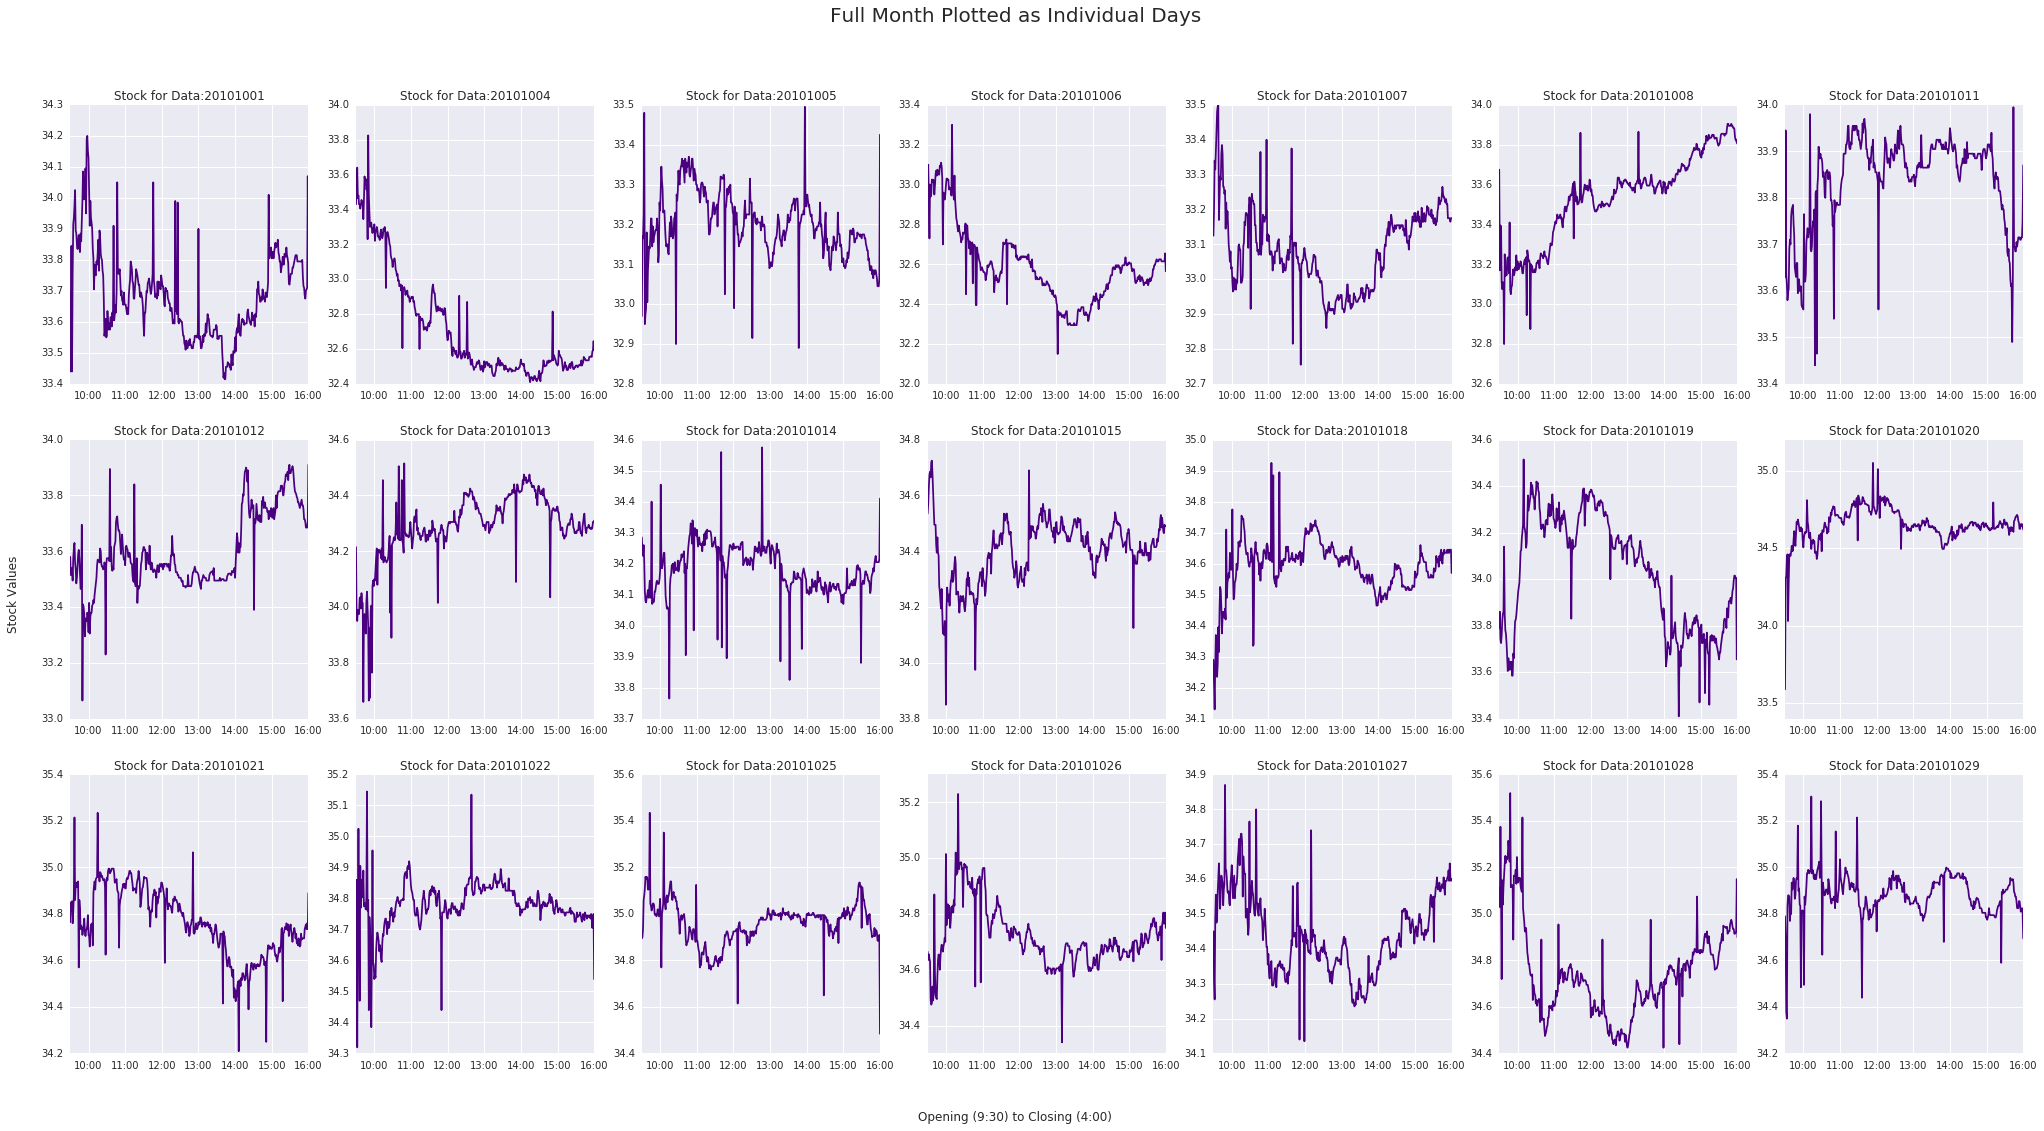

In [87]:
graph_all_days_in_month('A')

Opening Day Value: 34.79 Closing Day Value: 34.695
Highest Market Value For Day: 35.305
Lowest Market Value For Day: 34.35


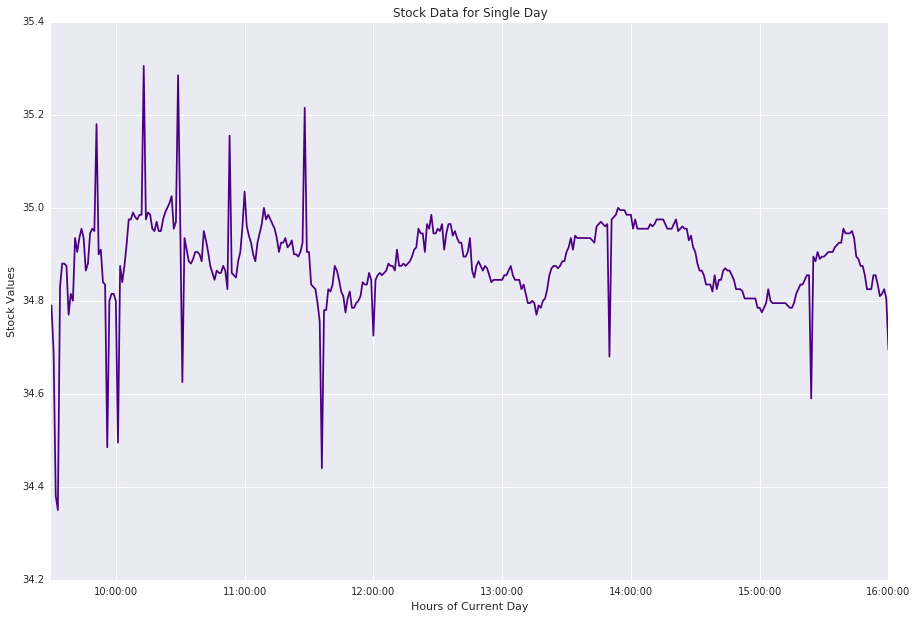

In [29]:
graph_single_day_stock_data('A',20101029)

Slope of Best fit is equal to: 0.320308757749
Numpy Correlation Coefficient is equal to: 0.62746616886
The slope  of best fit and the numpy correlation coefficient are for full month of data.


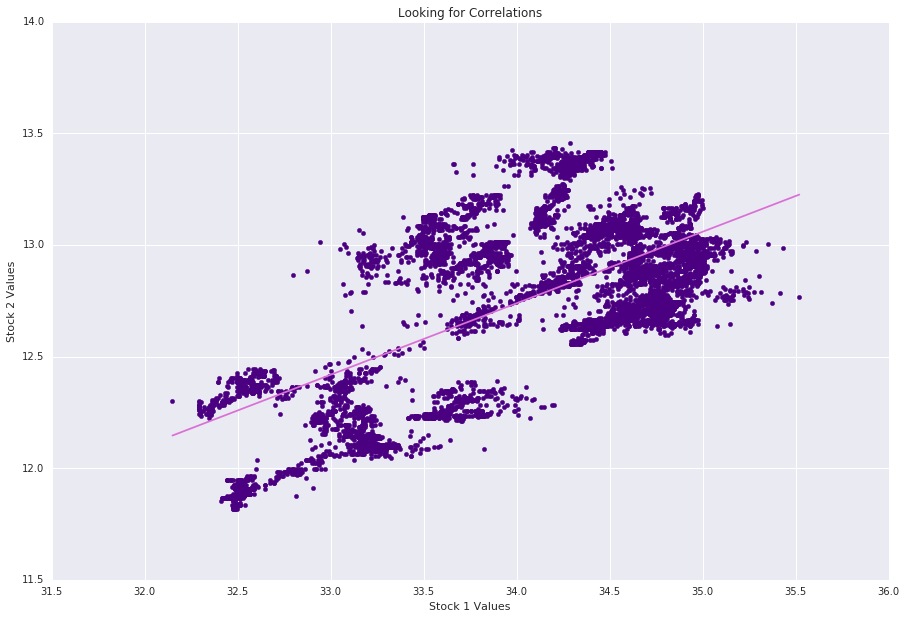

In [88]:
graph_find_correlation('A','AA')

## Bayesian Correlations

In [31]:
import pymc3 as pm

In [32]:
def find_top_ten(symbol1,stocks):
    stock1 = pull_all_data_in_month(minute_stock_data_OCT2010,symbol1) #stock we are doing comparisons against
    correlations = [(stock,np.corrcoef(stock1,pull_all_data_in_month(minute_stock_data_OCT2010,stock))[1,0]) for stock in stocks if stock!=symbol1]
    return sorted(correlations, key=lambda tup: abs(tup[1]),reverse=True)[:10]

In [38]:
r_top = find_top_ten('A',stock_market_symbols)

KeyboardInterrupt: 

In [41]:
print(r_top)
stock_A_data = pull_all_data_in_month(minute_stock_data_OCT2010,'A')

[('CVH', 0.93566656736363396), ('SNX', 0.93244569201960226), ('TRW', 0.932349922543531), ('HUM', 0.9310453997018312), ('NRP', 0.92573048681558578), ('FDS', 0.9245026029228044), ('LNN', 0.923985853783449), ('SQM', 0.91942851581403651), ('ACM', 0.91842611861927725), ('TTO', 0.91582748658899948)]


### Stock 'A' shares strongest correlation with Stock 'CVH'

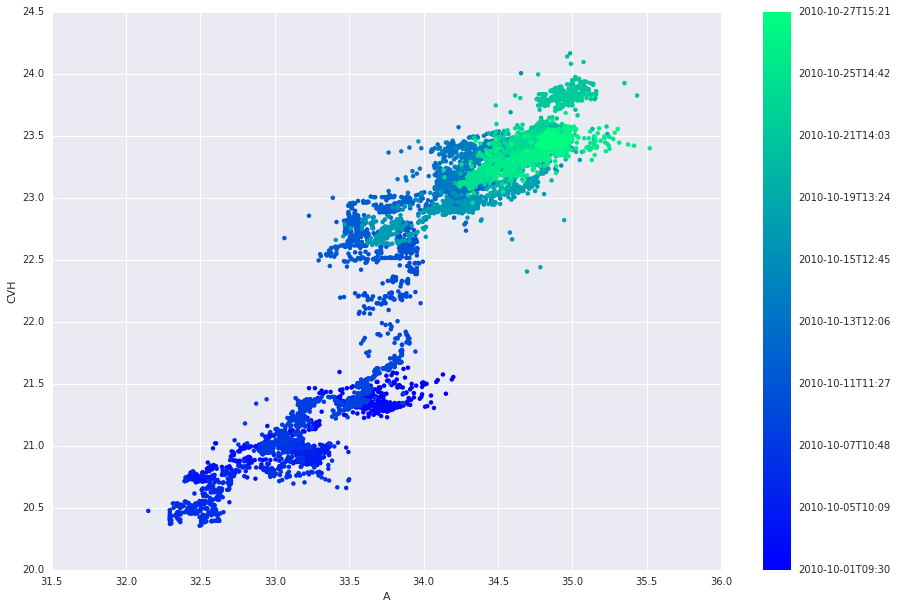

In [91]:
bayesian_correlation('A','CVH')


In [44]:
with pm.Model() as model_reg:
    pm.glm.glm('CVH ~ A', stock_dataframe)
    trace_reg = pm.sample(2000)



100%|██████████| 2000/2000 [01:31<00:00, 21.94it/s]


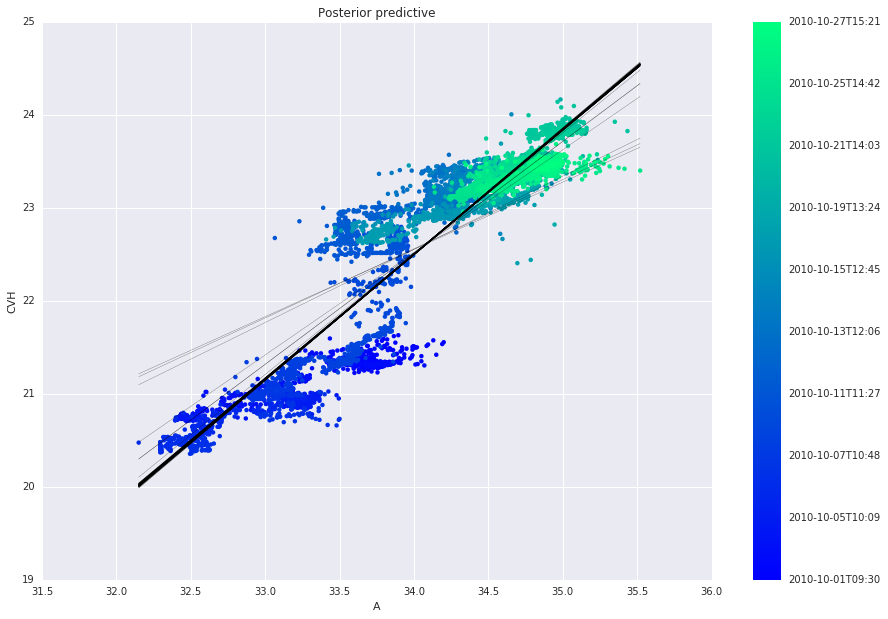

In [90]:
sc=bayesian_correlation('A','CVH')
pm.glm.plot_posterior_predictive(trace_reg[100:], samples=100,
                              label='posterior predictive regression lines',
                              lm=lambda x, sample: sample['Intercept'] + sample['A'] * x,
                              eval=np.linspace(stock_dataframe.A.min(), stock_dataframe.A.max(), 100))
cb.ax.set_yticklabels([time for time in time_stamps[::len(time_stamps)//10]]);

We can see above the a linear model does not prodivde the best fit for our data

In [51]:
model_randomwalk = pm.Model()
with model_randomwalk:
    # std of random walk, best sampled in log space.
    sigma_alpha = pm.Exponential('sigma_alpha', 1./.02, testval = .1)
    sigma_beta = pm.Exponential('sigma_beta', 1./.02, testval = .1)

In [52]:
import theano.tensor as T

In [53]:
subsample_alpha = 51 #has to divide evenly into data set
subsample_beta = 51
with model_randomwalk:
    alpha = pm.GaussianRandomWalk('alpha', sigma_alpha**-2,
                                  shape=len(stock_dataframe) // subsample_alpha)
    beta = pm.GaussianRandomWalk('beta', sigma_beta**-2,
                                 shape=len(stock_dataframe) // subsample_beta)

    # Make coefficients have the same length as prices
    alpha_r = T.repeat(alpha, subsample_alpha)
    beta_r = T.repeat(beta, subsample_beta)


In [54]:
print(alpha_r,beta_r)

Reshape{1}.0 Reshape{1}.0


In [55]:
with model_randomwalk:
    # Define regression
    regression = alpha_r + beta_r * stock_dataframe.A.values

    # Assume prices are Normally distributed, the mean comes from the regression.
    sd_A_CVH = pm.Uniform('sd', 0, 20)
    likelihood = pm.Normal('y',
                           mu=regression,
                           sd=sd_A_CVH,
                           observed=stock_dataframe.CVH.values)


In [57]:
from scipy import optimize
with model_randomwalk:
    # First optimize random walk
    start = pm.find_MAP(vars=[alpha, beta], fmin=optimize.fmin_l_bfgs_b)

    # Sample
    step = pm.NUTS(scaling=start)
    trace_rw = pm.sample(2000, step, start=start)

    #Choose better starting values, maximum likliehood
    #Do course fit and try getting every 10th fit
    

100%|██████████| 2000/2000 [3:21:23<00:00,  5.39s/it]


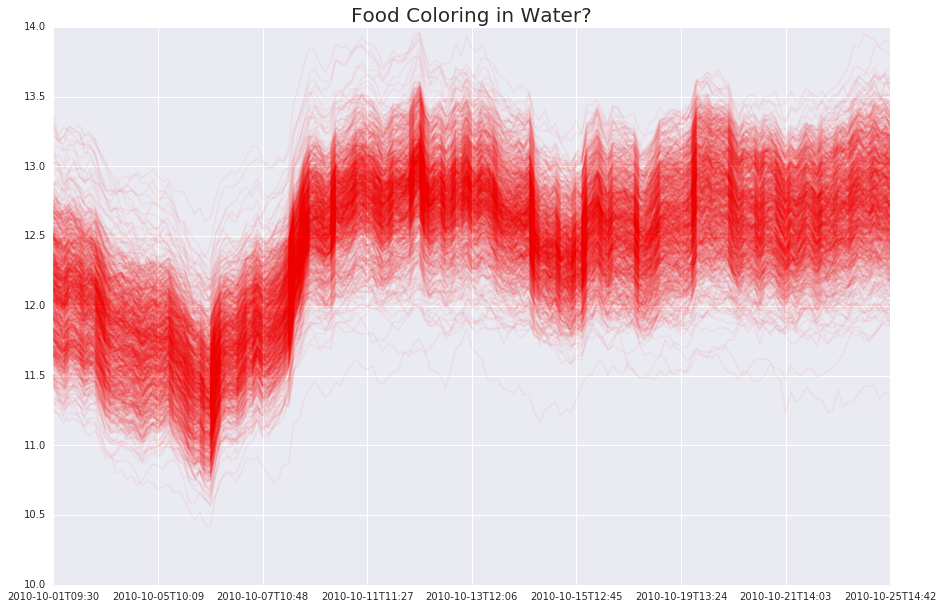

In [64]:
fig_A_CVH_intercept, ax_A_CVH_intercept = plt.subplots(figsize=(15,10))
ax_A_CVH_intercept.plot(trace_rw[-1000:][alpha].T, 'r', alpha=.05);
ax_A_CVH_intercept.set_xticklabels([time for time in time_stamps[::len(time_stamps)//10]]);
plt.title('Food Coloring in Water?',fontsize=20)

KeyError: '[ 0.31396572  0.3102881   0.30896001  0.31824076  0.30605303  0.32472626\n  0.30068646  0.31228916  0.29430434  0.31277269  0.29174321  0.2927865\n  0.29111821  0.29067204  0.28826542  0.31745014  0.28948235  0.3083108\n  0.31183585  0.31043569  0.3099858   0.30474019  0.3202612   0.32181998\n  0.29347028  0.30550207  0.31294499  0.30085963  0.30194038  0.31384333\n  0.29473269  0.30836645  0.30334973  0.30455557  0.30482487  0.29398621\n  0.29132507  0.2926841   0.30380942  0.30640828  0.30194445  0.31827205\n  0.30731066  0.3169222   0.3254379   0.31794575  0.31691736  0.33168601\n  0.304392    0.3014039 ]'

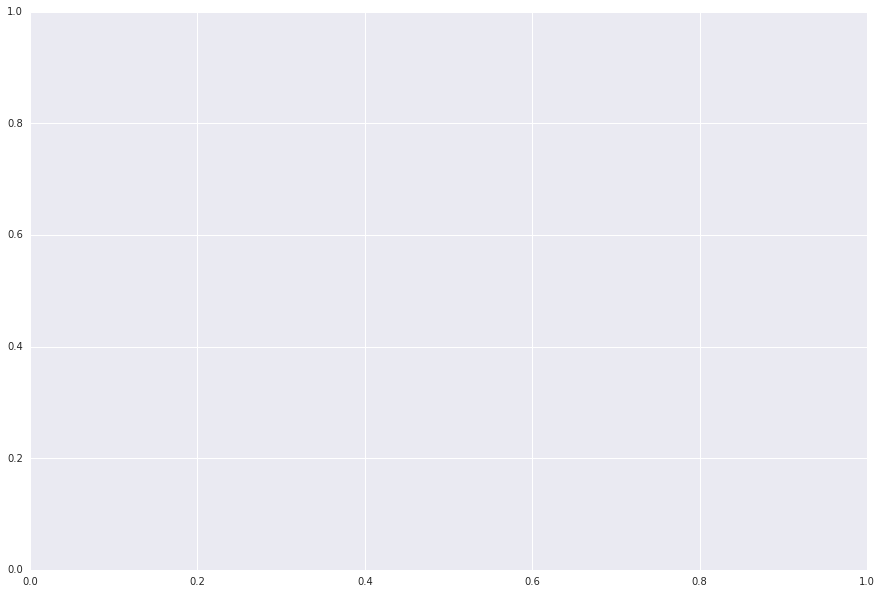

In [93]:
fig_A_CVH_Slope, ax_A_CVH_Slope = plt.subplots(figsize=(15,10))
ax_A_CVH_Slope.plot(trace_rw[-1000:][beta].T, 'b', alpha=.05);
print(beta)
ax_A_CVH_Slope.set_xticklabels([time for time in time_stamps[::len(time_stamps)//10]]);

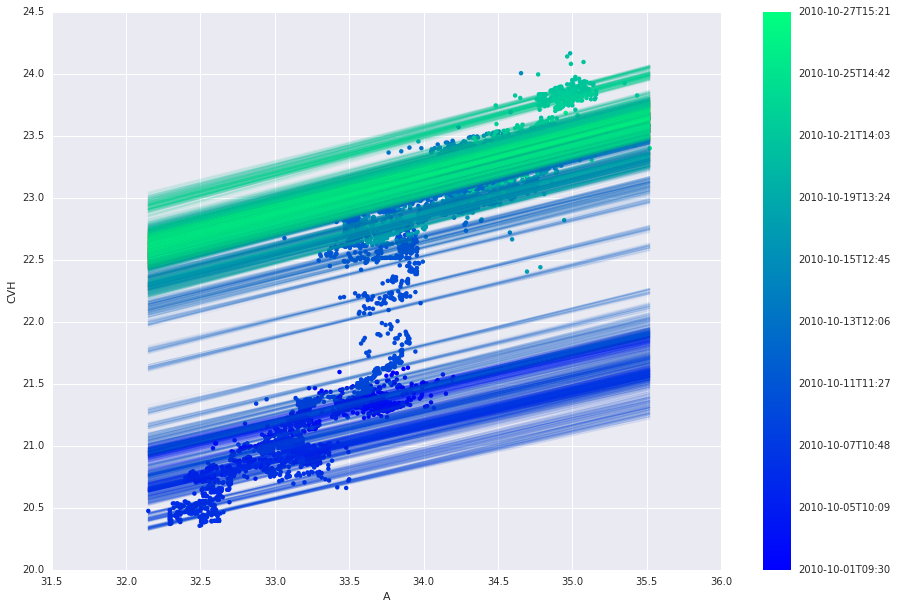

In [71]:
sc=bayesian_correlation('A','CVH')
colors_sc = np.linspace(0.1, 1, len(trace_rw[-500::10]['alpha'].T))
mymap_sc = plt.get_cmap("winter")
xi_A_CVH = np.linspace(stock_dataframe.A.min(), stock_dataframe.A.max(), 51)
for i, (alpha, beta) in enumerate(zip(trace_rw[-500::10]['alpha'].T, trace_rw[-500::10]['beta'].T)):
    for a, b in zip(alpha, beta):
        plt.plot(xi_A_CVH, a + b*xi_A_CVH, alpha=.05, lw=1, c=mymap_sc(colors_sc[i]))

### Stock 'A' shares weakest correlation with Stock 'NSH'

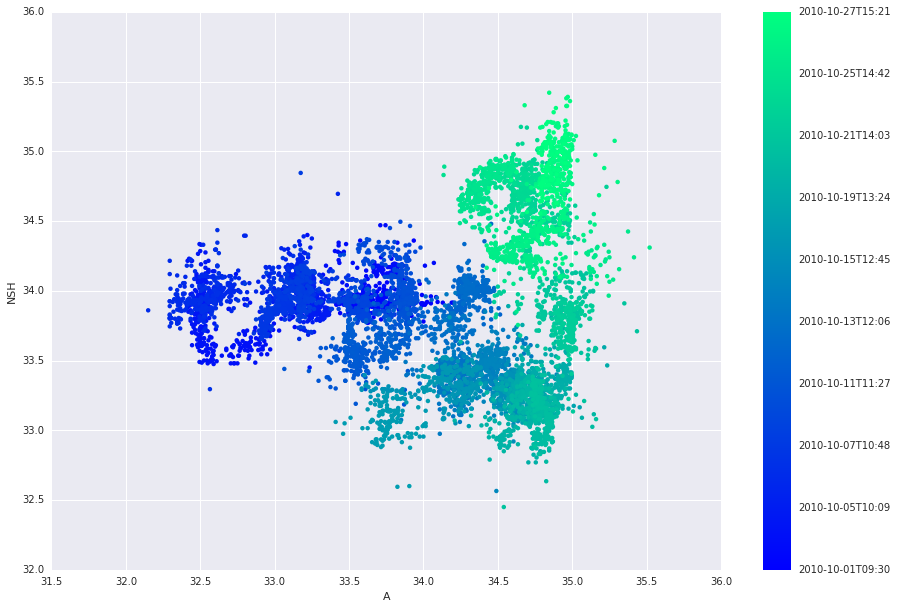

In [809]:
bayesian_correlation('A','NSH')

In [833]:
with pm.Model() as model_reg:
    pm.glm.glm('NSH ~ A', stock_dataframe)
    trace_reg_2 = pm.sample(2000)


100%|██████████| 2000/2000 [01:39<00:00, 20.10it/s]


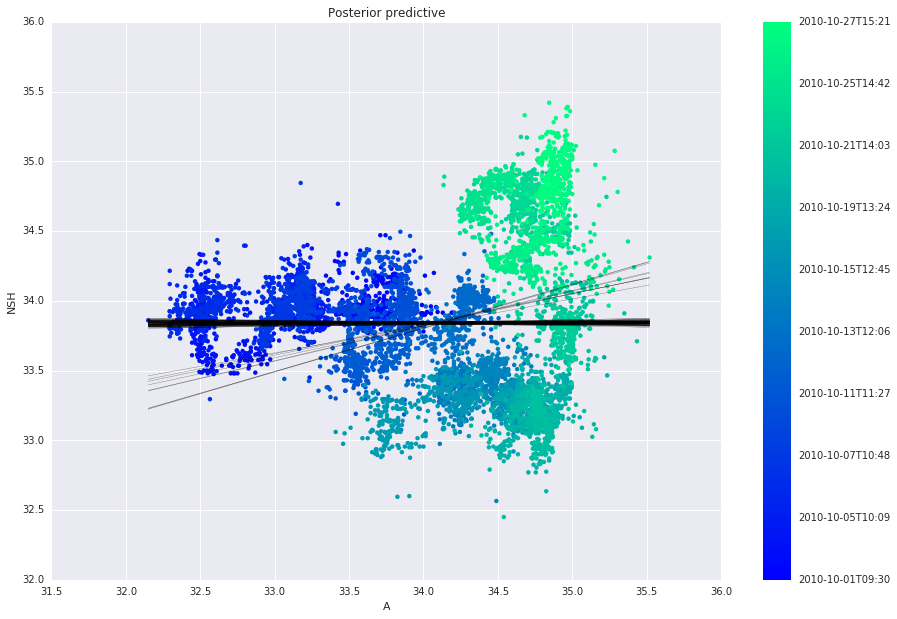

In [839]:
bayesian_correlation('A','NSH')
sc = ax.scatter(stock_dataframe.A, stock_dataframe.NSH, c=colors, cmap=mymap, lw=0)
pm.glm.plot_posterior_predictive(trace_reg_2[100:], samples=100,
                              label='posterior predictive regression lines',
                              lm=lambda x, sample: sample['Intercept'] + sample['A'] * x,
                              eval=np.linspace(stock_dataframe.A.min(), stock_dataframe.A.max(), 100))

## Keras Implementation

Following steps given in this specific tutorial

In [734]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math

A simple method that we can use is to split the ordered dataset into train and test datasets. The code below calculates the index of the split point and separates the data into the training datasets with 67% of the observations that we can use to train our model, leaving the remaining 33% for testing the model.

In [687]:
#I will use the full month data set for stock A and the time stamps
stock_A_data = pull_all_data_in_month(minute_stock_data_OCT2010,'A')

8211


In [688]:
train_A_length = int(len(stock_A_data)*0.67)
test_A_length = len(stock_A_data)-train_A_length
#Splitting the dataset into train and test (this is minute wise?)

In [690]:
train_A, test_A = stock_A_data[0:train_A_length,],stock_A_data[train_A_length:len(stock_A_data)]
print(len(train_A),len(test_A))

5501 2710


In [691]:
look_back = 5
#try to predict five minutes ahead of time?

In [727]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        #print(dataset[i:(i+look_back)])
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)
#Function that reshapes the given dataset into a dataset matrix.

In [728]:
train_A_X, train_A_Y = create_dataset(train_A,look_back)
test_A_X, test_A_Y = create_dataset(test_A,look_back)
print(train_A_X)
print(test_A_X)

[[ 33.695  33.44   33.845  33.44   33.755]
 [ 33.44   33.845  33.44   33.755  33.915]
 [ 33.845  33.44   33.755  33.915  33.935]
 ..., 
 [ 34.75   34.74   34.71   34.725  34.75 ]
 [ 34.74   34.71   34.725  34.75   34.78 ]
 [ 34.71   34.725  34.75   34.78   34.725]]
[[ 34.735  34.75   34.795  34.71   34.705]
 [ 34.75   34.795  34.71   34.705  34.66 ]
 [ 34.795  34.71   34.705  34.66   34.705]
 ..., 
 [ 34.825  34.855  34.855  34.835  34.81 ]
 [ 34.855  34.855  34.835  34.81   34.815]
 [ 34.855  34.835  34.81   34.815  34.825]]


In [729]:
train_A_X = np.reshape(train_A_X, (train_A_X.shape[0], train_A_X.shape[1]))
test_A_X = np.reshape(test_A_X, (test_A_X.shape[0], test_A_X.shape[1]))

[[ 33.695  33.44   33.845  33.44   33.755]
 [ 33.44   33.845  33.44   33.755  33.915]
 [ 33.845  33.44   33.755  33.915  33.935]
 ..., 
 [ 34.75   34.74   34.71   34.725  34.75 ]
 [ 34.74   34.71   34.725  34.75   34.78 ]
 [ 34.71   34.725  34.75   34.78   34.725]]


Simple network with 1 input, i hidden layer, 8 neurons and an ouput layer. 
Model is fit with mean_squared error

In [731]:
batch_size = 1
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_A_X, train_A_Y, nb_epoch=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 1050.1988
Epoch 2/200
0s - loss: 883.5401
Epoch 3/200
0s - loss: 732.6147
Epoch 4/200
0s - loss: 596.3889
Epoch 5/200
0s - loss: 474.6684
Epoch 6/200
0s - loss: 367.3878
Epoch 7/200
0s - loss: 274.4306
Epoch 8/200
0s - loss: 195.6390
Epoch 9/200
0s - loss: 130.9089
Epoch 10/200
0s - loss: 80.0011
Epoch 11/200
0s - loss: 42.5111
Epoch 12/200
0s - loss: 17.8815
Epoch 13/200
0s - loss: 4.8869
Epoch 14/200
0s - loss: 0.7969
Epoch 15/200
0s - loss: 0.4394
Epoch 16/200
0s - loss: 0.4383
Epoch 17/200
0s - loss: 0.4384
Epoch 18/200
0s - loss: 0.4385
Epoch 19/200
0s - loss: 0.4383
Epoch 20/200
0s - loss: 0.4384
Epoch 21/200
0s - loss: 0.4384
Epoch 22/200
0s - loss: 0.4382
Epoch 23/200
0s - loss: 0.4384
Epoch 24/200
0s - loss: 0.4384
Epoch 25/200
0s - loss: 0.4384
Epoch 26/200
0s - loss: 0.4384
Epoch 27/200
0s - loss: 0.4384
Epoch 28/200
0s - loss: 0.4384
Epoch 29/200
0s - loss: 0.4383
Epoch 30/200
0s - loss: 0.4383
Epoch 31/200
0s - loss: 0.4384
Epoch 32/200
0s - loss: 0.

In [732]:
trainScore = model.evaluate(train_A_X, train_A_Y, verbose=0)
    #Testing the performance

In [735]:
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

Train Score: 0.44 MSE (0.66 RMSE)


In [736]:
testScore = model.evaluate(test_A_X, test_A_Y, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Test Score: 1.02 MSE (1.01 RMSE)


In [737]:
train_A_Predict = model.predict(train_A_X)
test_A_Predict = model.predict(test_A_X)

trainPredictPlot = np.empty_like(stock_A_data)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(train_A_Predict)+look_back] = train_A_Predict

testPredictPlot = np.empty_like(stock_A_data)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_A_Predict)+(look_back*2)+1:len(stock_A_data)-1] = test_A_Predict

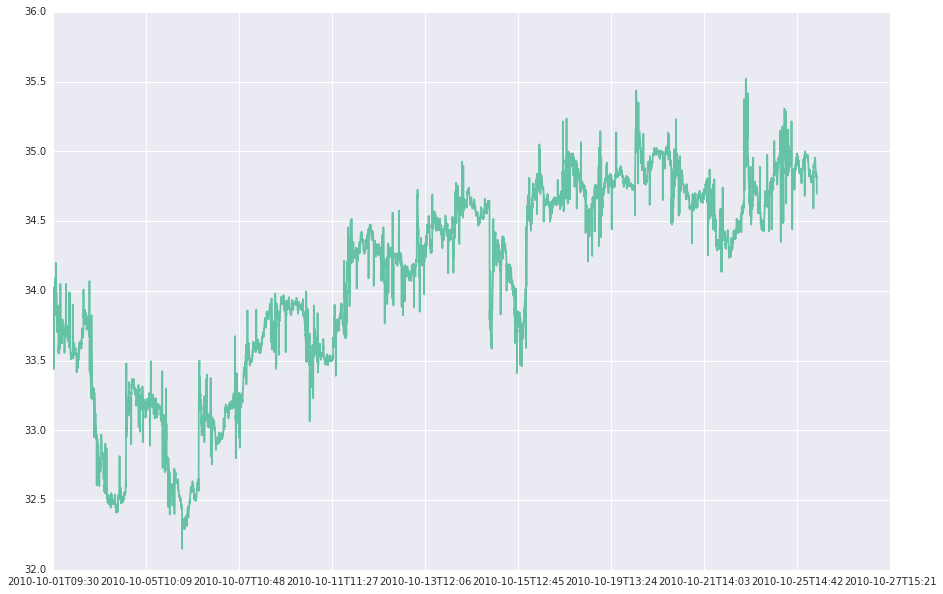

In [97]:
fig2,ax2 = plt.subplots(figsize=(15,10))
ax2.plot(stock_A_data)
ax2.set_xticklabels([time for time in time_stamps[::len(time_stamps)//10]]);

In [760]:
import pymc3

### Next 2 Week goals

1. Start using tf and keras on code (hopefully we have more by this point)
2. Do any modifications necessary if new dataset is introduced
3. Do all the things I need to 


|Weeks|Goals|Ideas+Methods|
|-----------|-------------|------------------|
|2 |Get data organized, finish up the access functions I've started above for better viewing. **Maybe request more data by the end of this point** get visualization graphs and try to get started on some of the comparisons between the different stocls|numpy arrays, seaborne for graphing, check if tf has any organization tools I don't know, functions for easy access and the like. and matplotlib|
|4| Definitely try to have completed comparisons by this point and try have completed creating models for a few of the stocks. hopefully will have more data by this point|still graphing tools so matplotlib and seaborne, start using tensorflow try to start creating different types of models see what works what doesnt really. here maybe with keras but also maybe save that for later?|
|6|Have a handful of models ready by this point that work reasonably well, have begun training and predicting by this point hopefully. Have begun incorporating keras |same as above mostly tensor flow and keras applications at this point|
|8|Continue developing and have begun starting testing for efficiency and accuracy of the models...see how well the previous weeks pan out and then move forward from there? Oh, begin running a few things on blue waters by this point so actually this point should maybe be on week 6.|same as above tensorflow and keras mostly|

#### Things to Accomplish

1. Complete Data access and data formatting functions enough to progress towards comparing the different sets
2. Begin with single stock build model off of it and then proceed to compare across the rest of the stocks (tf)
        -Determine its success and effectivity
        -Continue to edit to create better and more effective model
        -Incorporate tf and keras to make it work better 
3. Create methods for better visualization of models and predictions


## Notes ##
I understand this data pretty easily it's a very readable set. I have a few random functions above that I am using just to organize it and make it easier for me to work wit h personally.

**Clarification Needed** 
    
    When we are comparing two different would it be more effective to compare day by day, the entire month, or each minute seperately?
    
    Create a model for each stock or just to try general similarieties between groups of stocks. Specific trend patterns and then narrow down from there?